<a href="https://colab.research.google.com/github/punitarani/MAT-494/blob/master/4.1%20Network%20Analysis%20Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4.1 Network Analysis Introduction

Key Concepts:

- Graph Models
- Laplacian Matrix

A **Network** structure is a collection of objects (nodes) and the relationships between them (edges).

A **Cluster** (Community) is a group of nodes that are more densely connected to each other than to the rest of the network.
Clusters are essential to gain a spatio-temporal understanding of large datasets from networks.

This section will introduce the foundations of network analysis and spectral clustering analysis.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Graph Models

A **Graph** is a mathematical structure that consists of a set of nodes and a set of edges that connect the nodes.
It is represented as a pair of sets $G = (V, E)$, where $V$ is the set of nodes and $E$ is the set of edges.

A **Directed Graph** is a graph where the edges have a direction.
Conversely, An **Undirected Graph** is a graph where the edges do not have a direction.
A **Weighted Graph** is a graph where the edges have a weight.
**Mixed Graphs** are graphs that contain both directed and undirected edges along with weighted and unweighted edges.

### Graph Features

- A **Path** is a sequence of nodes that are connected by edges.
- A **Cycle** is a path that starts and ends at the same node.

- A **Tree** is a graph that has no cycles.
- A **Forest** is a graph that has no cycles and is connected.
- A **Spanning Tree** is a tree that contains all the nodes in the graph.
- A **Spanning Forest** is a forest that contains all the nodes in the graph.

- An **n-hop neighborhood** of a node is the set of nodes that are at most $n$ hops away from the node.
- The **degree** of a node is the number of edges that are connected to the node.

### Graph Models for Social Networks

Social Networks are best represented as **Graphs** where the nodes are the users and the edges are the relationships between the users.

#### Example of Social Networks

- Facebook
  - Nodes: Users
  - Edges: Friendship
  - Degree: Number of friends
- Twitter
  - In-degree: Number of followers
  - Out-degree: Number of following

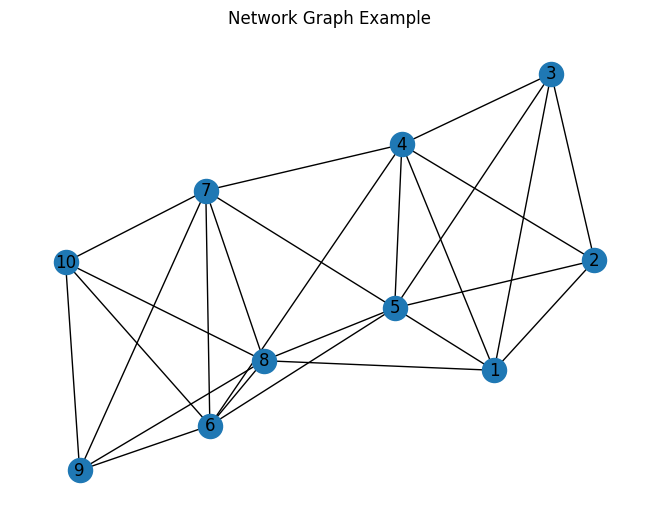

In [3]:
G = nx.Graph()

# Create 10 nodes
G.add_nodes_from([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# Randomly connect the nodes
G.add_edges_from([
    (1, 2), (1, 3), (1, 4), (1, 5), (1, 8),
    (2, 3), (2, 4), (2, 5),
    (3, 4), (3, 5),
    (4, 5), (4, 6), (4, 7),
    (5, 6), (5, 7), (5, 8),
    (6, 7), (6, 8), (6, 9), (6, 10),
    (7, 8), (7, 9), (7, 10),
    (8, 9), (8, 10),
    (9, 10),
])

# Draw the graph
nx.draw(G, with_labels=True)
plt.title("Network Graph Example")
plt.show()

## Laplacian Matrix

A graph with $n$ nodes can be represented as an $n \times n$ matrix $A$ where $A_{ij} = 1$ if there is an edge between nodes $i$ and $j$, otherwise $A_{ij} = 0$.

- $A$ is called the **Adjacency Matrix**.
- If A is a **Directed Graph**, then $A_{ij} = 1$ if there is an edge from node $i$ to node $j$, otherwise $A_{ij} = 0$.
- If A is an **Undirected Graph**, then $A_{ij} = A_{ji}$ and it is **Symmetric** ($A = A^T$)
- If A is a **Weighted Graph**, then $A_{ij}$ is the weight of the edge between nodes $i$ and $j$. Also follows the same rules as above.

The **Laplacian Matrix** is a matrix that is used to represent the connectivity of a graph.

The Laplacian Matrix $L$ of a Graph $G$ is defined as:

$L_{ij} = \begin{cases} \Sigma_{k} E_{ik}, & \text{ if } i = j, \\ -E_{ij}, & \text{ if } i \neq j \text{ and } v_i \text{ is adjacent to  } v_j, \\ 0, & \text{otherwise.} \end{cases}$

### Incidence Matrix

An **Incidence Matrix** is a matrix that is used to represent the connectivity of a graph.
It represents the edges of a graph as columns and the nodes of a graph as rows.

In [4]:
# Generate Adjacency Matrix
A = nx.adjacency_matrix(G)
print(A.todense())

[[0 1 1 1 1 0 0 1 0 0]
 [1 0 1 1 1 0 0 0 0 0]
 [1 1 0 1 1 0 0 0 0 0]
 [1 1 1 0 1 1 1 0 0 0]
 [1 1 1 1 0 1 1 1 0 0]
 [0 0 0 1 1 0 1 1 1 1]
 [0 0 0 1 1 1 0 1 1 1]
 [1 0 0 0 1 1 1 0 1 1]
 [0 0 0 0 0 1 1 1 0 1]
 [0 0 0 0 0 1 1 1 1 0]]
